## Importation des Bibliothèques et Modules

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os


## Acquisition des Données

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

donnees_entrainement = pd.read_csv('../data/dataframe_2016_to_2019.csv')


1.1. Création d'un Tableau Croisé pour les Types d'Événements

In [5]:
# Création d'un tableau croisé pour les types d'événements
tableau_croise = pd.crosstab(donnees_entrainement['isGoal'], donnees_entrainement['typeDescKey'])
tableau_croise


typeDescKey,goal,shot-on-goal
isGoal,,
0,0,296406
1,30936,0


1.2. Binning des Distances et des Angles

In [6]:
# Binning des distances
donnees_entrainement['distance_tir_bin'] = pd.cut(
    donnees_entrainement['shotDistance'],
    bins=[0, 20, 40, 60, 80, 100, 120, 140, 160, 180, 200],
    labels=['0-19', '20-39', '40-59', '60-79', '80-99', '100-119', '120-139', '140-159', '160-179', '180-200']
)

# Binning des angles
donnees_entrainement['angle_tir_bin'] = pd.cut(
    donnees_entrainement['shotAngle'],
    bins=[0, 20, 40, 60, 80, 100, 120, 140, 160, 180],
    labels=['0-19', '20-39', '40-59', '60-79', '80-99', '100-119', '120-139', '140-159', '160-179']
)


1.3. Fonction pour Tracer des Histogrammes avec Binning

In [7]:
sns.set_style("whitegrid")
sns.set_context("talk")  

def tracer_histogramme(df, x_bin, hue, shrink, xlabel, ylabel, titre, legend_title, legend_labels):
    plt.figure(figsize=(12, 7))
    sns.histplot(
        data=df,
        x=x_bin,
        hue=hue,
        multiple='dodge',
        palette='viridis',  
        shrink=shrink,
        edgecolor='black',  
        linewidth=0.5
    )
    plt.xlabel(xlabel, fontsize=14)
    plt.ylabel(ylabel, fontsize=14)
    plt.title(titre, fontsize=16, fontweight='bold')
    plt.ylim(0, df[x_bin].value_counts().max() * 1.1)  
    plt.legend(title=legend_title, labels=legend_labels, fontsize=12, title_fontsize=12)
    plt.xticks(fontsize=12)
    plt.yticks(fontsize=12)
    plt.grid(axis="y", linestyle='--', alpha=0.7)
    plt.tight_layout()
    plt.show()

1.4. Histogramme du Nombre de Tirs par Distance (Buts et Non-Buts Séparés)

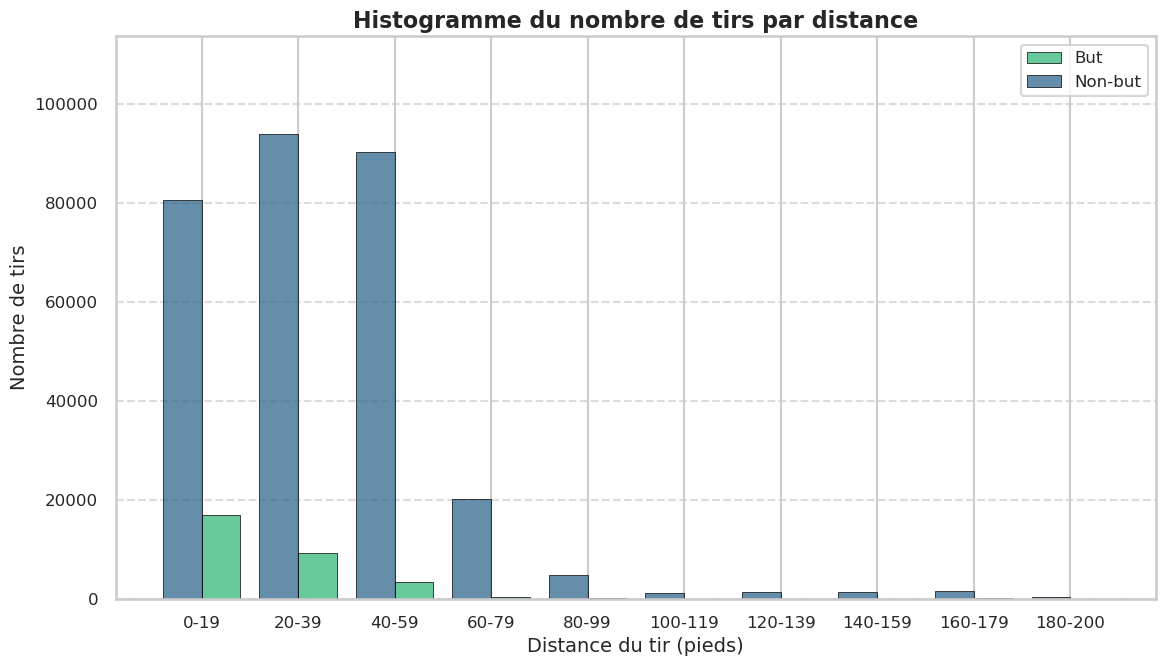

In [8]:
# Histogramme du nombre de tirs par distance avec le style moderne
tracer_histogramme(
    df=donnees_entrainement,
    x_bin='distance_tir_bin',
    hue='isGoal',
    shrink=0.8,
    xlabel='Distance du tir (pieds)',
    ylabel='Nombre de tirs',
    titre='Histogramme du nombre de tirs par distance',
    legend_title='',
    legend_labels=['But', 'Non-but']
)


1.5. Histogramme du Nombre de Tirs par Angle (Buts et Non-Buts Séparés)

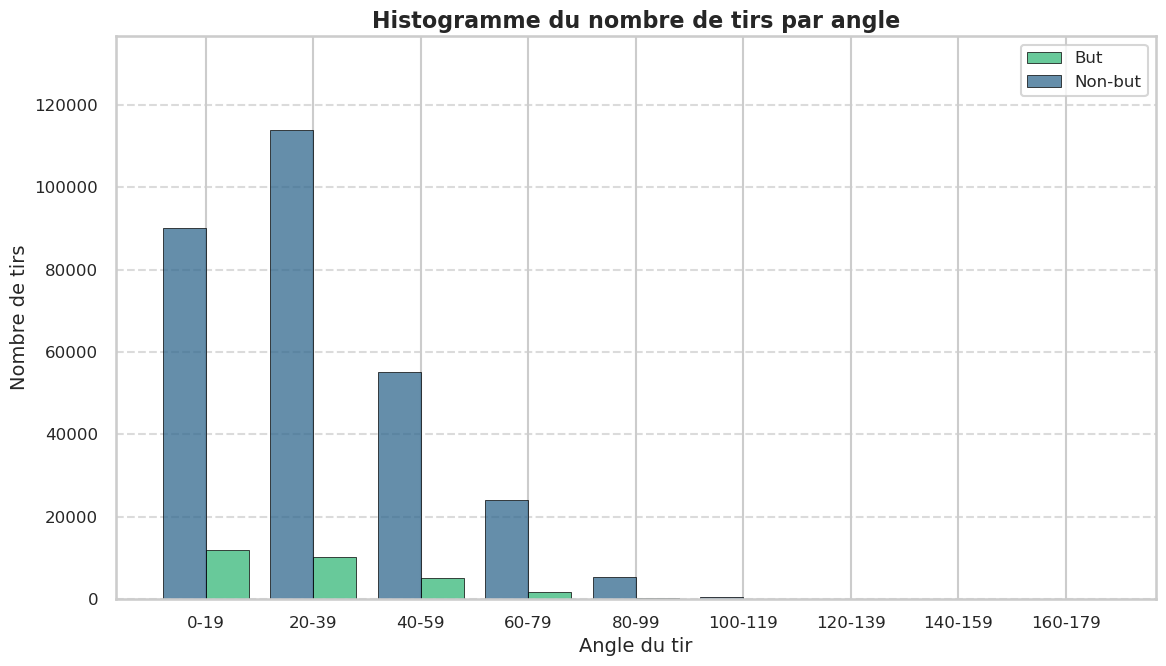

In [9]:
# Utilisation de la fonction modifiée pour l'histogramme du nombre de tirs par angle
tracer_histogramme(
    df=donnees_entrainement,
    x_bin='angle_tir_bin',
    hue='isGoal',
    shrink=0.8,
    xlabel='Angle du tir',
    ylabel='Nombre de tirs',
    titre='Histogramme du nombre de tirs par angle',
    legend_title='',
    legend_labels=['But', 'Non-but']
)


In [49]:
sns.set_style("whitegrid")
sns.set_context("talk")

def tracer_histogramme_2d_plt(df, x, y, bins, label_color, xlabel, ylabel, titre):
    df_clean = df.dropna(subset=[x, y])
    plt.figure(figsize=(12, 8))
    cmap = sns.color_palette("viridis", as_cmap=True)
    h = plt.hist2d(
        df_clean[x],
        df_clean[y],
        bins=bins,
        cmap=cmap,
        cmin=1
    )
    cbar = plt.colorbar()
    cbar.ax.set_ylabel(label_color, rotation=270, labelpad=15, fontsize=12)
    plt.xlabel(xlabel, fontsize=14)
    plt.ylabel(ylabel, fontsize=14)
    plt.title(titre, fontsize=16, fontweight='bold')
    plt.xticks(fontsize=12)
    plt.yticks(fontsize=12)
    plt.grid(True, linestyle='--', alpha=0.7)
    plt.tight_layout()
    plt.show()

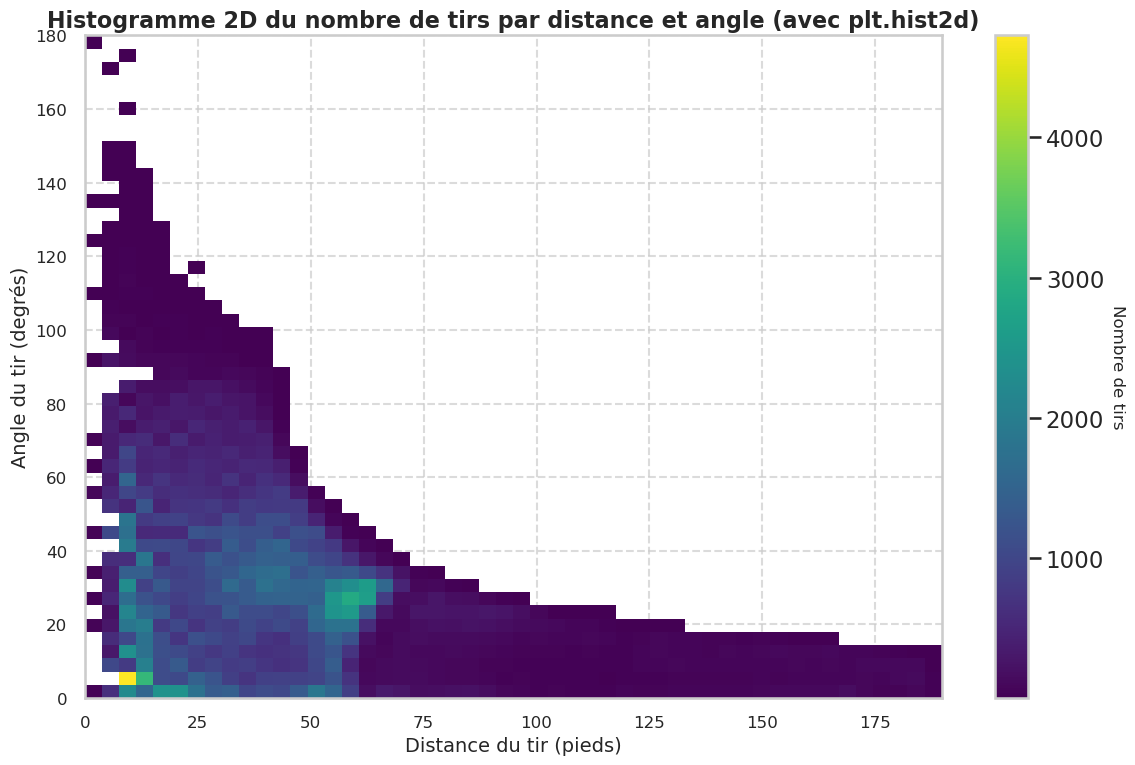

In [50]:
tracer_histogramme_2d_plt(
    df=donnees_entrainement,
    x='shotDistance',
    y='shotAngle',
    bins=50,
    label_color='Nombre de tirs',
    xlabel='Distance du tir (pieds)',
    ylabel='Angle du tir (degrés)',
    titre='Histogramme 2D du nombre de tirs par distance et angle (avec plt.hist2d)'
)

Question 2 : Taux de But en Fonction de la Distance et de l'Angle

2.1. Calcul du Taux de But par Distance

In [ ]:

taux_but_distance = donnees_entrainement.groupby('shotDistance')['isGoal'].mean().reset_index()
taux_but_distance.columns = ['shotDistance', 'tauxBut']


2.3. Taux de But en Fonction de la Distance

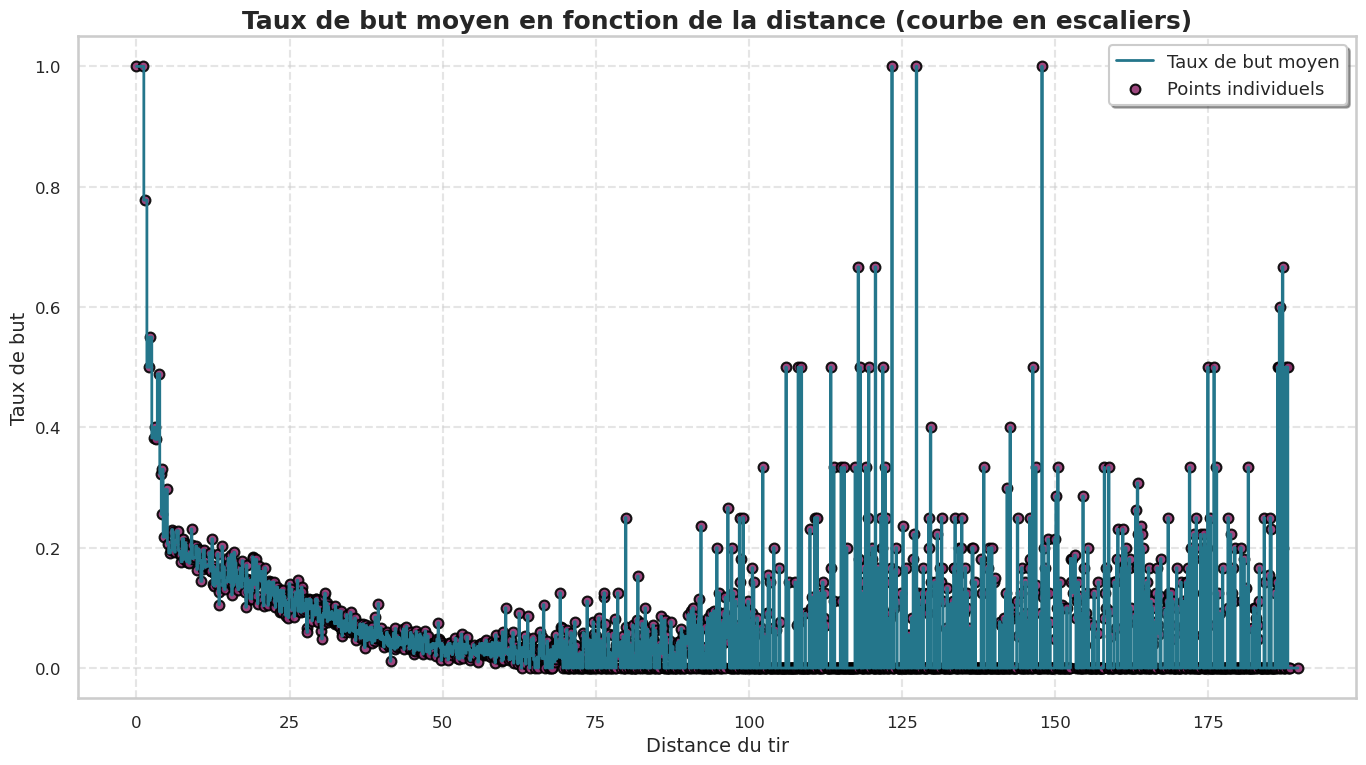

In [ ]:
def tracer_courbe_escaliers(df, x, y, titre, xlabel, ylabel):
    sns.set_style("whitegrid")
    sns.set_context("talk")

    plt.figure(figsize=(14, 8))
    df_sorted = df.sort_values(by=x)

    line_color = sns.color_palette("crest", as_cmap=True)(0.6)
    point_color = sns.color_palette("flare", as_cmap=True)(0.7)

    plt.step(
        df_sorted[x],
        df_sorted[y],
        color=line_color,
        linewidth=2,
        where='mid',
        label='Taux de but moyen'
    )

    plt.scatter(
        df_sorted[x],
        df_sorted[y],
        color=point_color,
        edgecolor='black',  
        s=50,  
        alpha=0.9,
        label='Points individuels'
    )

    plt.xlabel(xlabel, fontsize=14)
    plt.ylabel(ylabel, fontsize=14)
    plt.title(titre, fontsize=18, fontweight='bold')
    plt.xticks(fontsize=12)
    plt.yticks(fontsize=12)
    plt.legend(fontsize=13, loc='upper right', frameon=True, shadow=True)

    plt.grid(axis='both', linestyle='--', alpha=0.5)

    plt.tight_layout()
    plt.show()


tracer_courbe_escaliers(
    df=taux_but_distance,
    x='shotDistance',
    y='tauxBut',
    titre='Taux de but moyen en fonction de la distance (courbe en escaliers)',
    xlabel='Distance du tir',
    ylabel='Taux de but'
)

2.4. Calcul du Taux de But par Angle

In [ ]:

taux_but_angle = donnees_entrainement.groupby('shotAngle')['isGoal'].mean().reset_index()
taux_but_angle.columns = ['shotAngle', 'tauxBut']


2.5. Taux de But en Fonction de l'Angle

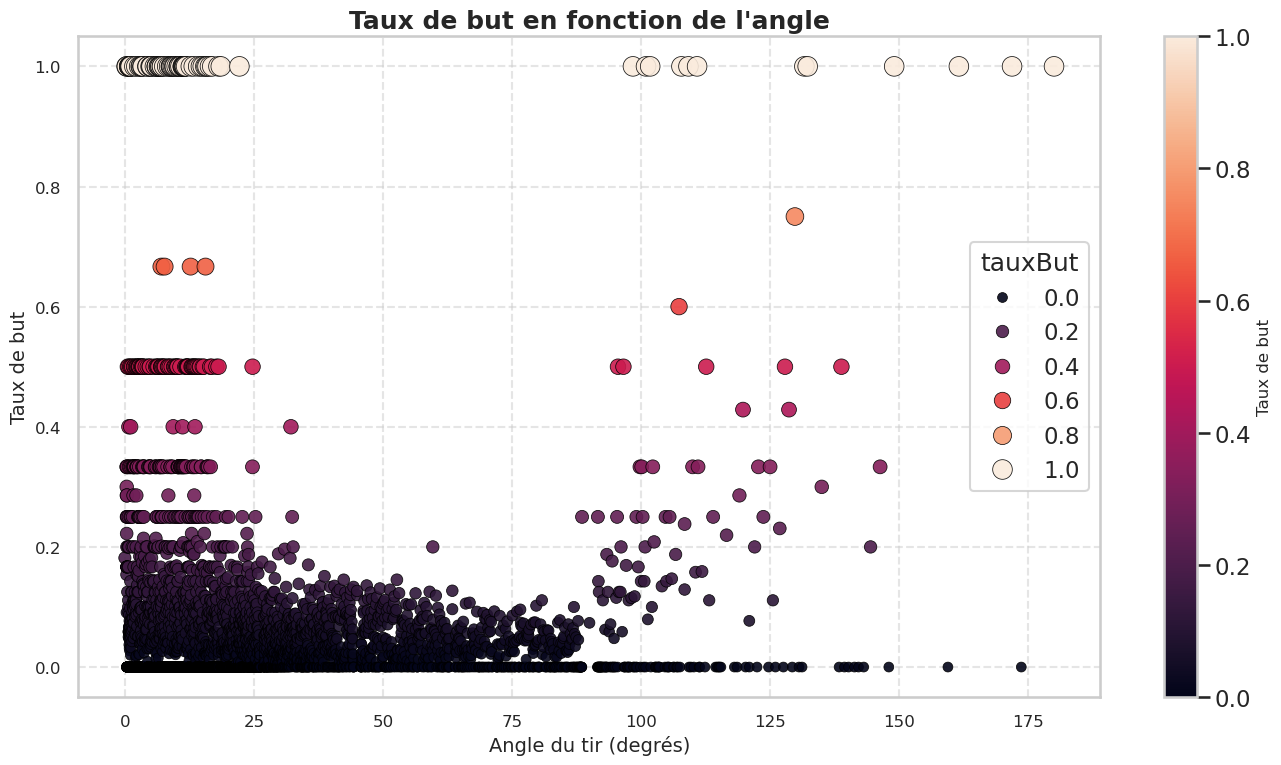

In [ ]:
def tracer_scatterplot_angle_moderne(df, x, y, titre, xlabel, ylabel):
    
    sns.set_style("whitegrid")
    sns.set_context("talk")

    plt.figure(figsize=(14, 8))

    
    colors = sns.color_palette("rocket", as_cmap=True)

    
    sns.scatterplot(
        data=df,
        x=x,
        y=y,
        hue=y,  
        palette=colors,
        size=y, 
        sizes=(50, 200),  
        alpha=0.9,  
        edgecolor='black'  
    )

    
    cbar = plt.colorbar(plt.cm.ScalarMappable(cmap="rocket"), ax=plt.gca())
    cbar.set_label("Taux de but", fontsize=12)

    
    plt.xlabel(xlabel, fontsize=14)
    plt.ylabel(ylabel, fontsize=14)
    plt.title(titre, fontsize=18, fontweight='bold')

    
    plt.xticks(fontsize=12)
    plt.yticks(fontsize=12)

    
    plt.grid(axis='both', linestyle='--', alpha=0.5)

    
    plt.tight_layout()

    
    plt.show()


tracer_scatterplot_angle_moderne(
    df=taux_but_angle,
    x='shotAngle',
    y='tauxBut',
    titre='Taux de but en fonction de l\'angle',
    xlabel='Angle du tir (degrés)',
    ylabel='Taux de but'
)


2.6. Calcul du Taux de But par Bins de Distance

In [17]:
# Calcul du taux de but par bins de distance
stats_but_distance = donnees_entrainement.groupby('distance_tir_bin', observed=True).agg(
    nb_buts=('isGoal', 'sum'),
    nb_tirs=('isGoal', 'count')
)
stats_but_distance['taux_but'] = stats_but_distance['nb_buts'] / stats_but_distance['nb_tirs']


2.7. Fonction pour Tracer le Taux de But

In [91]:
def tracer_taux_but_combine(df, x, y, taux, taux_min, taux_max, titre, font_size, xlabel, xlabel_size, ylabel, ylabel_size):
    fig, ax1 = plt.subplots(figsize=(10, 6))

    # Barres pour le taux de but
    bars = ax1.bar(df.index, df[taux]*100, color='lightblue', edgecolor='black', label='Taux de but (%)')

    # Ajouter les annotations sur les barres
    for bar, (_, row) in zip(bars, df.iterrows()):
        nb_buts = int(row[x])
        nb_tirs = int(row[y])
        taux_i = row[taux]
        ax1.text(
            bar.get_x() + bar.get_width() / 2,
            bar.get_height(),
            f"{taux_i*100:.1f}%\n({nb_buts}/{nb_tirs})",
            ha='center',
            va='bottom',
            fontsize=9,
            color='black'
        )

    # Titre et axes
    ax1.set_title(titre, fontsize=font_size)
    ax1.set_xlabel(xlabel, fontsize=xlabel_size)
    ax1.set_ylabel(ylabel, fontsize=ylabel_size)
    ax1.set_ylim(taux_min, taux_max)
    ax1.grid(alpha=0.5, linestyle='--', axis='y')

    # Ajuster la taille des ticks de l'axe des abscisses
    ax1.tick_params(axis='x', labelsize=10)

    # Courbe pour la tendance
    ax2 = ax1.twinx()
    ax2.plot(df.index, df[taux]*100, color='red', marker='o', label='Tendance', linewidth=2)
    ax2.set_ylim(taux_min, taux_max)

    # Légendes
    fig.legend(loc="upper right", bbox_to_anchor=(1, 1), bbox_transform=ax1.transAxes, fontsize=10)
    plt.tight_layout()
    plt.show()

2.8. Taux de But en Fonction de la Distance (Binned)

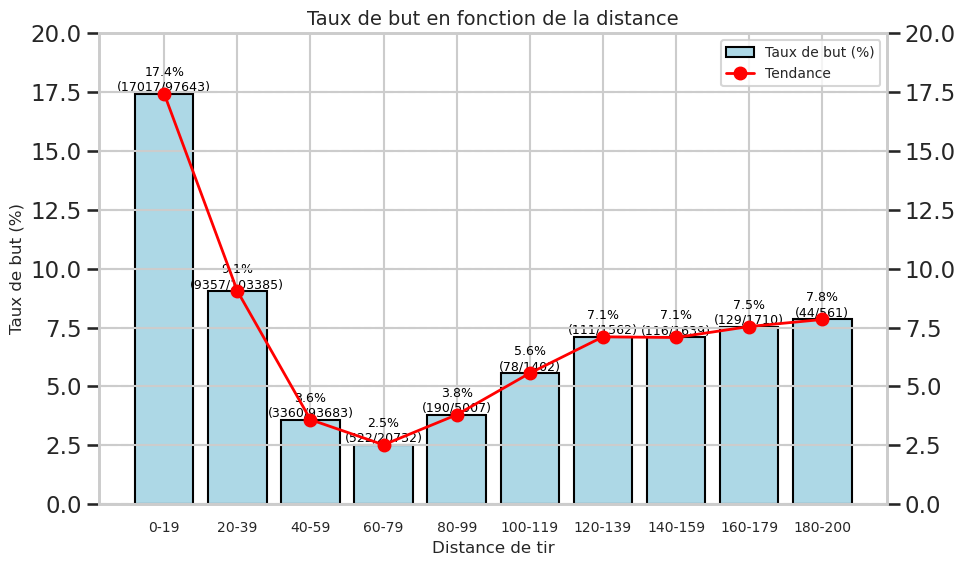

In [96]:
tracer_taux_but_combine(
    df=stats_but_distance,
    x='nb_buts',
    y='nb_tirs',
    taux='taux_but',
    taux_min=0,
    taux_max=20,
    titre='Taux de but en fonction de la distance',
    font_size=14,
    xlabel='Distance de tir',
    xlabel_size=12,
    ylabel='Taux de but (%)',
    ylabel_size=12
)

2.9. Calcul du Taux de But par Bins d'Angle

In [20]:
# Calcul du taux de but par bins d'angle
stats_but_angle = donnees_entrainement.groupby('angle_tir_bin', observed=True).agg(
    nb_buts=('isGoal', 'sum'),
    nb_tirs=('isGoal', 'count')
)
stats_but_angle['taux_but'] = stats_but_angle['nb_buts'] / stats_but_angle['nb_tirs']


2.10. Taux de But en Fonction de l'Angle (Binned)

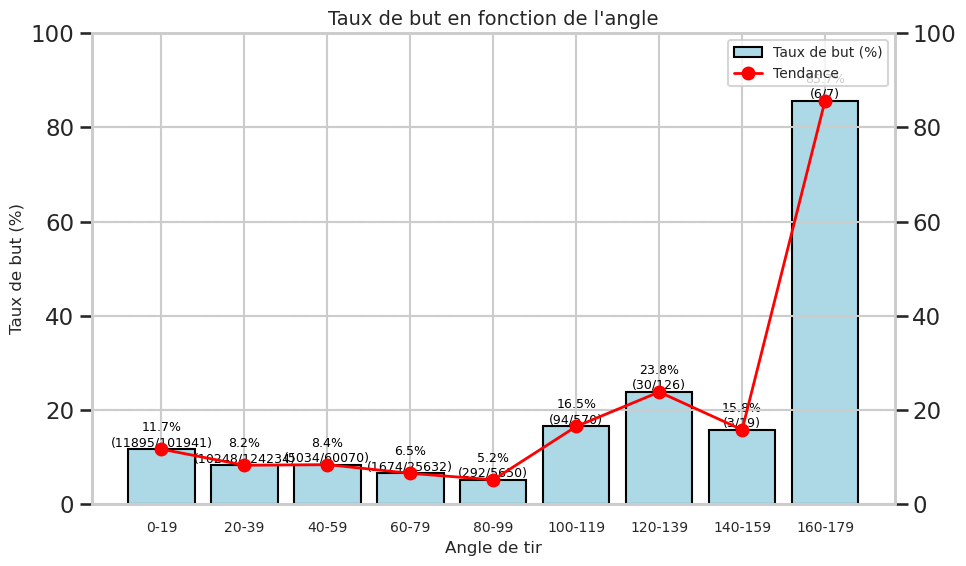

In [93]:
# Tracé du taux de but en fonction de l'angle (binned)
tracer_taux_but_combine(
    df=stats_but_angle,
    x='nb_buts',
    y='nb_tirs',
    taux='taux_but',
    taux_min=0,
    taux_max=100,
    titre='Taux de but en fonction de l\'angle',
    font_size=14,
    xlabel='Angle de tir',
    xlabel_size=12,
    ylabel='Taux de but (%)',
    ylabel_size=12
)


Question 3 : Vérifications des Anomalies Potentielles

3.1. Filtrage des Données pour les Buts depuis une Grande Distance sans Filet Vide

In [94]:
# Filtrage des données pour les buts depuis une distance supérieure à 90 sans filet vide
tirs_suspects = donnees_entrainement[
    (donnees_entrainement['shotDistance'] > 90) &
    (donnees_entrainement['typeDescKey'] == 'goal') &
    (donnees_entrainement['emptyGoalNet'] == 0)
]

# Nombre d'événements suspects
print(f"Nombre d'événements suspects : {len(tirs_suspects)}")


Nombre d'événements suspects : 118


3.2. Inspection d'un Événement Spécifique

In [24]:
# Inspection de l'événement avec l'index 54362
evenement_specifique = tirs_suspects.loc[54362, :]
evenement_specifique


Year                                  2016
idGame                          2016020894
gameType                    regular-season
periodType                              SO
numberPeriod                             5
typeDescKey                           goal
eventOwnerTeam                     Rangers
gameSeconds                           4800
previousEventType             shot-on-goal
timeSinceLastEvent                     0.0
previousXCoord                        74.0
previousYCoord                        -3.0
xCoord                               -71.0
yCoord                                 5.0
zoneShoot                                O
shootingPlayer             Mats Zuccarello
goaliePlayer             Frederik Andersen
shotType                          backhand
teamSide                              away
emptyGoalNet                             0
isGoalAdvantage                  Advantage
isGoal                                   1
shotDistance                         160.1
distanceFro

3.3. Observations sur les Anomalies

3.4. Filtrage des Données pour Tous les Buts depuis une Grande Distance

In [25]:
# Filtrage des données pour tous les buts depuis une distance supérieure à 90
tirs_longs = donnees_entrainement[
    (donnees_entrainement['shotDistance'] > 90) &
    (donnees_entrainement['typeDescKey'] == 'goal')
]

# Groupement par type de tir
groupes_tirs = tirs_longs.groupby(['shotType']).count()
print(groupes_tirs['idGame'])


shotType
backhand        36
deflected        2
slap            34
snap            41
tip-in          18
wrap-around      1
wrist          437
Name: idGame, dtype: int64


3.5. Inspection des Tirs de Type "Wrap-Around" depuis une Grande Distance

In [26]:
# Tirs de type "wrap-around" depuis une grande distance
tirs_wrap_around = tirs_longs[tirs_longs['shotType'] == 'wrap-around']
tirs_wrap_around


,Year,idGame,gameType,periodType,numberPeriod,typeDescKey,eventOwnerTeam,gameSeconds,previousEventType,timeSinceLastEvent,...,isGoal,shotDistance,distanceFromLastEvent,rebound,speedFromLastEvent,shotAngle,reboundAngleShot,offensivePressureTime,distance_tir_bin,angle_tir_bin
47255,2016,2016020779,regular-season,REG,3,goal,Penguins,3582,takeaway,2.0,...,1,92.0,22.1,False,11.05,0.622756,0.0,101.0,80-99,0-19


In [31]:
def plot_goals_by_distance(df):
    # Filtrer uniquement les buts
    buts_uniquement = df[df['typeDescKey'] == 'goal']

    # Remplacer les NaN dans 'emptyGoalNet' par 0
    buts_uniquement['emptyGoalNet'] = buts_uniquement['emptyGoalNet'].fillna(0)

    # Créer des bins pour la distance
    buts_uniquement['distance_bin'] = pd.cut(
        buts_uniquement['shotDistance'],
        bins=[0, 20, 40, 60, 80, 100, 120, 140, 160, 180, 200],
        labels=['0-19', '20-39', '40-59', '60-79', '80-99', '100-119', '120-139', '140-159', '160-179', '180-200']
    )

    # Tracer l'histogramme
    plt.figure(figsize=(10, 6))
    sns.histplot(
        data=buts_uniquement,
        x='distance_bin',
        hue='emptyGoalNet',
        multiple='dodge',
        shrink=0.8,
        palette='Set1'
    )
    plt.xlabel('Distance du tir (pieds)')
    plt.ylabel('Nombre de buts')
    plt.title('Histogramme des buts par distance (filet vide vs non-vide)')
    plt.legend(title='Filet vide', labels=['Non-vide', 'Vide'])
    plt.grid(axis="y")
    plt.show()


/tmp/ipykernel_244686/4463515.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  buts_uniquement['emptyGoalNet'] = buts_uniquement['emptyGoalNet'].fillna(0)
/tmp/ipykernel_244686/4463515.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  buts_uniquement['distance_bin'] = pd.cut(


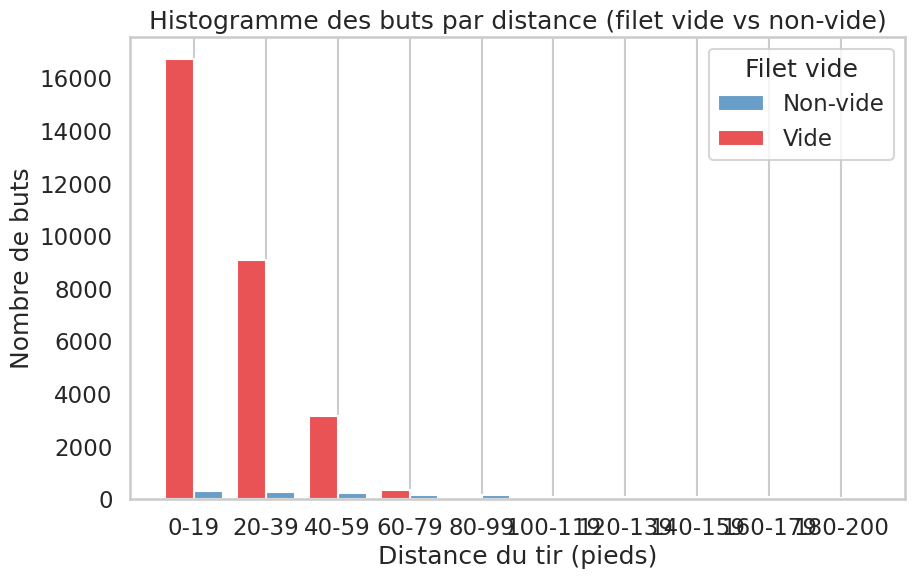

In [95]:
# Appeler la fonction pour tracer
plot_goals_by_distance(train_data)


Le graphique présente la répartition des buts marqués en fonction de la distance au filet, en distinguant ceux réalisés avec des filets vides de ceux avec des filets non vides. Il ressort que la majorité des buts marqués avec des filets non vides sont réalisés à proximité du filet. Cela s'explique par le fait que les tirs rapprochés offrent une meilleure probabilité de réussite, car ils sont plus difficiles à bloquer pour le gardien. En revanche, les buts marqués avec des filets vides sont peu nombreux, quelle que soit la distance. Cette rareté s'explique par la stratégie particulière des équipes, qui retirent leur gardien uniquement dans des contextes spécifiques, comme en fin de match lorsqu'elles tentent de réduire un écart de score.

Une analyse approfondie des buts marqués depuis l'intérieur de la zone défensive, à une distance supérieure à 90 pieds, a révélé des cas d'incohérences dans les données. Par exemple, lors du match entre les New York Rangers et les Toronto Maple Leafs du 23 février 2017, le but de Mats Zuccarello, marqué pendant la séance de tirs au but, a été incorrectement enregistré dans les données de la NHL. Il était indiqué comme ayant été réalisé du côté gauche de la patinoire à une position éloignée (-71,5), alors qu'il avait en réalité été marqué depuis le côté droit, comme confirmé par les vidéos du match. Cette erreur a conduit à une distance calculée anormalement grande.

D'autres anomalies ont également été identifiées, notamment en ce qui concerne le type de tir. Lors du match entre les Pittsburgh Penguins et les St. Louis Blues, le 4 février 2017, Sidney Crosby a inscrit un but au centre de la patinoire avec un tir de type wrist shot. Toutefois, les données de la NHL avaient classé ce tir comme un wrap-around, ce qui est techniquement impossible, car ce type de tir est toujours effectué à proximité immédiate du filet. Ces observations mettent en lumière l'importance de vérifier et de nettoyer les données avant toute analyse, car les erreurs, bien que rares, peuvent affecter les résultats et mener à des interprétations incorrectes.

3.6. Observations sur les Tirs "Wrap-Around"